<a href="https://colab.research.google.com/github/hongnhan217/AI_Class/blob/main/AI_W4_24_02_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 43.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=b30c96f6a928412d4da0677b0b01dce16085fcf9a192ed0770f9836b477e0bbe
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


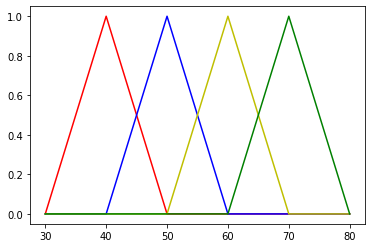

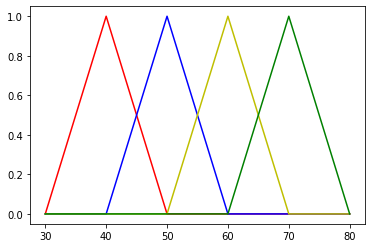

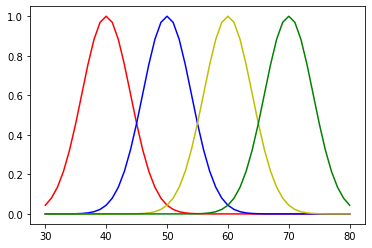

In [4]:
import numpy as np 
import skfuzzy as fuzz
import matplotlib.pyplot as plt
# create a array
x = np.arange(30, 81, 1)

slow = fuzz.trimf(x,[30, 40, 50])
medium = fuzz.trimf(x,[40, 50, 60])
medium_fast = fuzz.trimf(x,[50, 60, 70])
full_speed = fuzz.trimf(x,[60, 70, 80])
# draw figure
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'Medium')
plt.plot(x, medium_fast, 'y', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, full_speed, 'g', linewidth = 1.5, label = 'Full Speed')

slow = fuzz.trapmf(x,[30, 40, 40, 50])
medium = fuzz.trapmf(x,[40, 50, 50, 60])
medium_fast = fuzz.trapmf(x,[50, 60, 60, 70])
full_speed = fuzz.trapmf(x,[60, 70, 70, 80])
# draw figure
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'Medium')
plt.plot(x, medium_fast, 'y', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, full_speed, 'g', linewidth = 1.5, label = 'Full Speed')

slow = fuzz.gaussmf(x, 40, 4)
medium = fuzz.gaussmf(x, 50, 4)
medium_fast = fuzz.gaussmf(x, 60, 4)
full_speed = fuzz.gaussmf(x, 70, 4)
# draw figure
plt.figure()
plt.plot(x, slow, 'r', linewidth = 1.5, label = 'Slow')
plt.plot(x, medium, 'b', linewidth = 1.5, label = 'Medium')
plt.plot(x, medium_fast, 'y', linewidth = 1.5, label = 'Medium Fast')
plt.plot(x, full_speed, 'g', linewidth = 1.5, label = 'Full Speed')


19.70120898100173


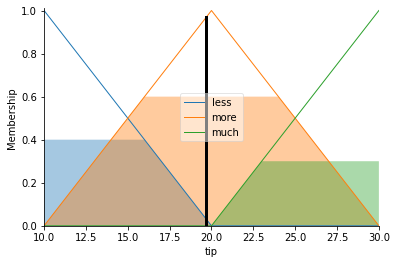

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#create data
food = ctrl.Antecedent(np.arange(0, 11, 1), 'food')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(10, 31, 1),'tip')
#process
food['poor'] = fuzz.trimf(food.universe, [0, 0, 0])
food['average'] = fuzz.trimf(food.universe, [0, 5, 10])
food['good'] = fuzz.trimf(food.universe, [5, 10, 10])
service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])
tip['less'] = fuzz.trimf(tip.universe, [10, 10, 20])
tip['more'] = fuzz.trimf(tip.universe, [10, 20, 30])
tip['much'] = fuzz.trimf(tip.universe, [20, 30, 30])
#draw
# food.view()
# service.view()
# tip.view()
# food['good'].view()
#rule
rule1 = ctrl.Rule(food['poor']&service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor']&service['average'],tip['less'])
rule3 = ctrl.Rule(food['poor']&service['good'],tip['more'])
rule4 = ctrl.Rule(food['average']&service['poor'],tip['less'])
rule5 = ctrl.Rule(food['average']&service['average'],tip['more'])
rule6 = ctrl.Rule(food['average']&service['good'],tip['much'])
rule7 = ctrl.Rule(food['good']&service['poor'],tip['more'])
rule8 = ctrl.Rule(food['good']&service['average'],tip['much'])
rule9 = ctrl.Rule(food['good']&service['good'],tip['much'])
# control 
tipping_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food'] = 6.5
tipping.input['service'] = 3
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

45.0


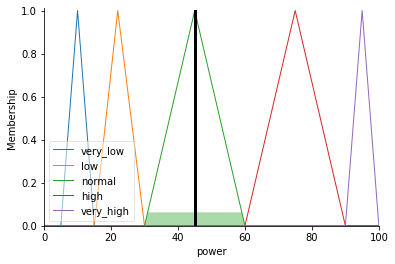

In [6]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import  control as ctrl

time = ctrl.Antecedent(np.arange(0, 181, 1), 'time')
#Unit of rice: g
rice = ctrl.Antecedent(np.arange(0, 1600, 100), 'rice')
power = ctrl.Consequent(np.arange(0, 101, 1), 'power')

time['very_fast'] = fuzz.trimf(time.universe, [10, 10, 20])
time['fast'] = fuzz.trimf(time.universe, [19, 25, 30])
time['average'] = fuzz.trimf(time.universe, [29, 45, 60])
time['slow'] = fuzz.trimf(time.universe, [59, 105, 150])
time['very_slow'] = fuzz.trimf(time.universe, [150, 165, 180])

rice['very_little'] = fuzz.trimf(rice.universe, [100, 150, 300])
rice['little'] = fuzz.trimf(rice.universe, [299, 400, 500])
rice['average'] = fuzz.trimf(rice.universe, [499, 600, 700])
rice['much'] = fuzz.trimf(rice.universe, [699, 850, 1000])
rice['very_much'] = fuzz.trimf(rice.universe, [999, 1250, 1501])

power['very_low'] = fuzz.trimf(power.universe, [5, 10, 15])
power['low'] = fuzz.trimf(power.universe, [15, 22, 30])
power['normal'] = fuzz.trimf(power.universe, [30, 45, 60])
power['high'] = fuzz.trimf(power.universe, [60, 75, 90])
power['very_high'] = fuzz.trimf(power.universe, [90, 95, 100])

# time.view()
# rice.view()
# power.view()

rule1 = ctrl.Rule(time['very_fast'] & rice['very_little'], power['very_low'])
rule2 = ctrl.Rule(time['very_fast'] & rice['little'], power['low'])
rule3 = ctrl.Rule(time['very_fast'] & rice['average'], power['normal'])
rule4 = ctrl.Rule(time['very_fast'] & rice['much'], power['high'])
rule5 = ctrl.Rule(time['very_fast'] & rice['very_much'], power['very_high'])

rule6 = ctrl.Rule(time['fast'] & rice['very_little'], power['very_low'])
rule7 = ctrl.Rule(time['fast'] & rice['little'], power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['average'], power['normal'])
rule9 = ctrl.Rule(time['fast'] & rice['much'], power['high'])
rule10 = ctrl.Rule(time['fast'] & rice['very_much'], power['very_high'])

rule11 = ctrl.Rule(time['average'] & rice['very_little'], power['low'])
rule12 = ctrl.Rule(time['average'] & rice['little'], power['low'])
rule13 = ctrl.Rule(time['average'] & rice['average'], power['normal'])
rule14 = ctrl.Rule(time['average'] & rice['much'], power['high'])
rule15 = ctrl.Rule(time['average'] & rice['very_much'], power['very_high'])

rule16 = ctrl.Rule(time['slow'] & rice['very_little'], power['high'])
rule17 = ctrl.Rule(time['slow'] & rice['little'], power['high'])
rule18 = ctrl.Rule(time['slow'] & rice['average'], power['high'])
rule19 = ctrl.Rule(time['slow'] & rice['much'], power['high'])
rule20 = ctrl.Rule(time['slow'] & rice['very_much'], power['high'])

rule21 = ctrl.Rule(time['very_slow'] & rice['very_little'], power['very_high'])
rule22 = ctrl.Rule(time['very_slow'] & rice['little'], power['high'])
rule23 = ctrl.Rule(time['very_slow'] & rice['average'], power['very_high'])
rule24 = ctrl.Rule(time['very_slow'] & rice['much'], power['very_high'])
rule25 = ctrl.Rule(time['very_slow'] & rice['very_much'], power['very_high'])


power_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12,rule13, 
                                 rule14, rule15, rule16, rule17, rule18, rule19, rule20, rule21, rule22, rule23, rule24, rule25])
powering = ctrl.ControlSystemSimulation(power_ctrl)

powering.input['time'] = 30
powering.input['rice'] = 600
powering.compute()

print(powering.output['power'])

power.view(sim=powering)